# Example Rainfall Plots - CESM

In [1]:
#data handling functions
import xarray
import numpy
import cftime

#plotting functions
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

In [2]:
#import my functions
import sys
sys.path.append('../')
import helpers.fileHandler as fh


Load some example data. CESM-LME splits rainfall into two parts, well just sum them.

In [3]:
preclDa = fh.loadModelData('CESM-LME', 'PRECL', '0850cntl.001')
preccDa = fh.loadModelData('CESM-LME', 'PRECC', '0850cntl.001')

/Volumes/Untitled/CMIP5-PMIP3/CESM-LME/mon/PRECL/
Files imported: 
 ['/Volumes/Untitled/CMIP5-PMIP3/CESM-LME/mon/PRECL/b.e11.B1850C5CN.f19_g16.0850cntl.001.cam.h0.PRECL.085001-184912.nc', '/Volumes/Untitled/CMIP5-PMIP3/CESM-LME/mon/PRECL/b.e11.B1850C5CN.f19_g16.0850cntl.001.cam.h0.PRECL.185001-200512.nc']
/Volumes/Untitled/CMIP5-PMIP3/CESM-LME/mon/PRECC/
Files imported: 
 ['/Volumes/Untitled/CMIP5-PMIP3/CESM-LME/mon/PRECC/b.e11.B1850C5CN.f19_g16.0850cntl.001.cam.h0.PRECC.085001-184912.nc', '/Volumes/Untitled/CMIP5-PMIP3/CESM-LME/mon/PRECC/b.e11.B1850C5CN.f19_g16.0850cntl.001.cam.h0.PRECC.185001-200512.nc']


In [4]:
prectDa = preclDa.PRECL+preccDa.PRECC

In [5]:
prectDa

<xarray.DataArray (time: 13872, lat: 96, lon: 144)>
dask.array<add, shape=(13872, 96, 144), dtype=float32, chunksize=(12000, 96, 144), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) object 0850-01-31 00:00:00 ... 2005-12-31 00:00:00
  * lat      (lat) float64 -90.0 -88.11 -86.21 -84.32 ... 84.32 86.21 88.11 90.0
  * lon      (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5

Example plot for Australia at time=500

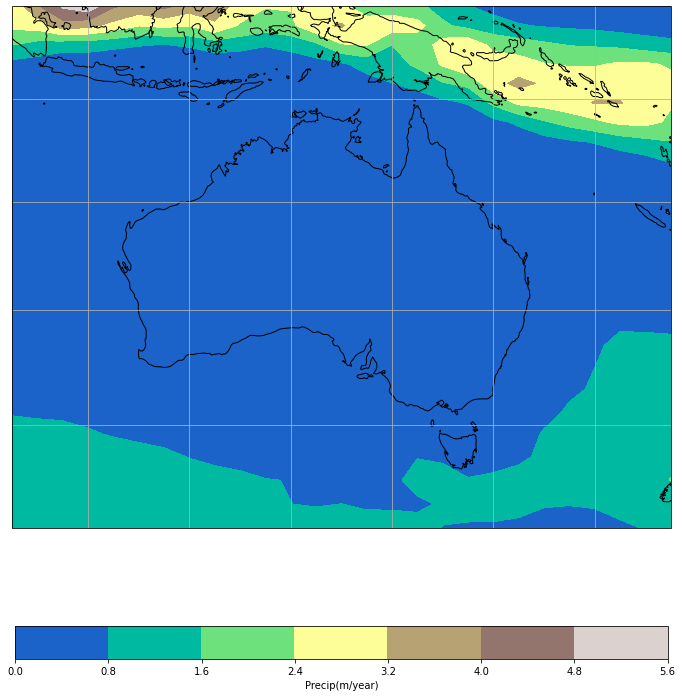

In [6]:
secondsPerYear = 60*60*24*265

domainDa=prectDa.where(
        (prectDa.lat>-50) & (prectDa.lat<0) & (prectDa.lon>100) & (prectDa.lon<170),
        drop=True
    )

prec=secondsPerYear*(domainDa.isel(time=500))

plt.figure(figsize=(12,12))

ax=plt.axes(projection=ccrs.Miller(central_longitude=120))

cs=plt.contourf(domainDa.lon, domainDa.lat, prec,transform=ccrs.PlateCarree(), cmap='terrain')

cbar=plt.colorbar(orientation='horizontal', fraction=0.05)
cbar.set_label('Precip(m/year)')

ax.coastlines(color='black')
ax.gridlines()
plt.show()


Example anomalies at time=500

In [7]:
mean = domainDa.groupby('time.month').mean(dim='time')

In [8]:
anomaliesDa=domainDa.groupby('time.month')-mean

/Users/ajs/opt/anaconda3/lib/python3.8/site-packages/xarray/core/indexing.py:1369: PerformanceWarning: Slicing with an out-of-order index is generating 578 times more chunks
  return self.array[key]


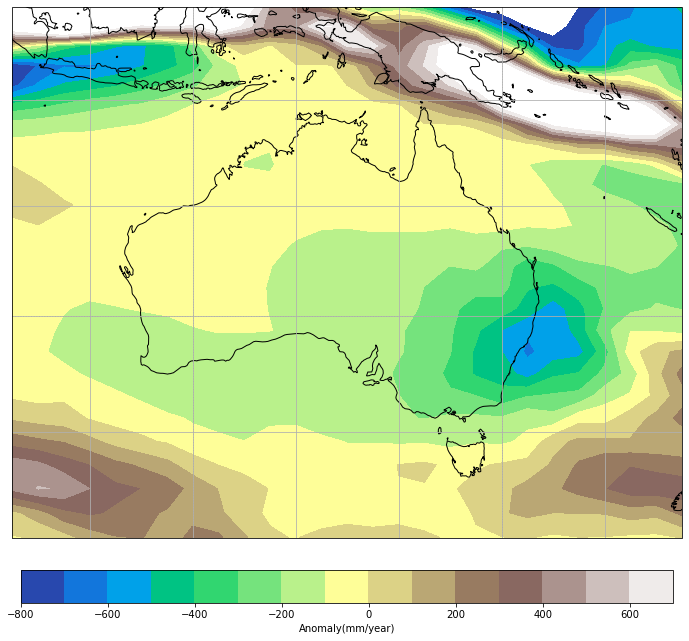

In [9]:
prec=secondsPerYear*1000*(anomaliesDa.isel(time=500))

plt.figure(figsize=(12,12))

ax=plt.axes(projection=ccrs.Miller(central_longitude=120))
precContours=range(-800,800,100)

cs=plt.contourf(anomaliesDa.lon, anomaliesDa.lat, prec, precContours, transform=ccrs.PlateCarree(), cmap='terrain')
ax.coastlines(color='black')

# Define gridline locations and draw the lines using cartopy's built-in gridliner:
xticks = numpy.arange(-180, 190, 30)
yticks = numpy.arange(-90, 100, 30)
ax.gridlines(xlocs=xticks, ylocs=yticks,linewidth=1, color='gray', alpha=0.5, linestyle=':')


cbar=plt.colorbar(orientation='horizontal', fraction=0.05, pad=0.05)
cbar.set_label('Anomaly(mm/year)')

ax.gridlines()
plt.show()
